In [56]:
import pandas as pd
import numpy as np

In [57]:
monthly_log_returns = pd.read_csv("../data/monthly_log_returns.csv", index_col=0, parse_dates=True)
cov_matrix = monthly_log_returns.cov()

In [58]:
S = cov_matrix.values
eigenvalues = np.linalg.eigvalsh(S) 
condition_number = np.max(eigenvalues)/np.min(eigenvalues)
print("The condition number is:", condition_number)

The condition number is: 29.343806918848998


In [59]:
from sklearn.covariance import LedoitWolf

In [60]:
lw = LedoitWolf() 
lw.fit(monthly_log_returns.values)
S_lw = lw.covariance_ 
delta = lw.shrinkage_ 
print("Fitted shrinkage is:", delta)

Fitted shrinkage is: 0.16415926864403999


In [61]:
S_lw_df = pd.DataFrame(S_lw, index=monthly_log_returns.columns, columns=monthly_log_returns.columns)
eigenvalues_lw = np.linalg.eigvals(S_lw)
cond_lw = eigenvalues_lw.max()/eigenvalues_lw.min()
print("Condition Number with Ledoit Wolf Shrinkage is:", cond_lw)


Condition Number with Ledoit Wolf Shrinkage is: 13.285248792972853


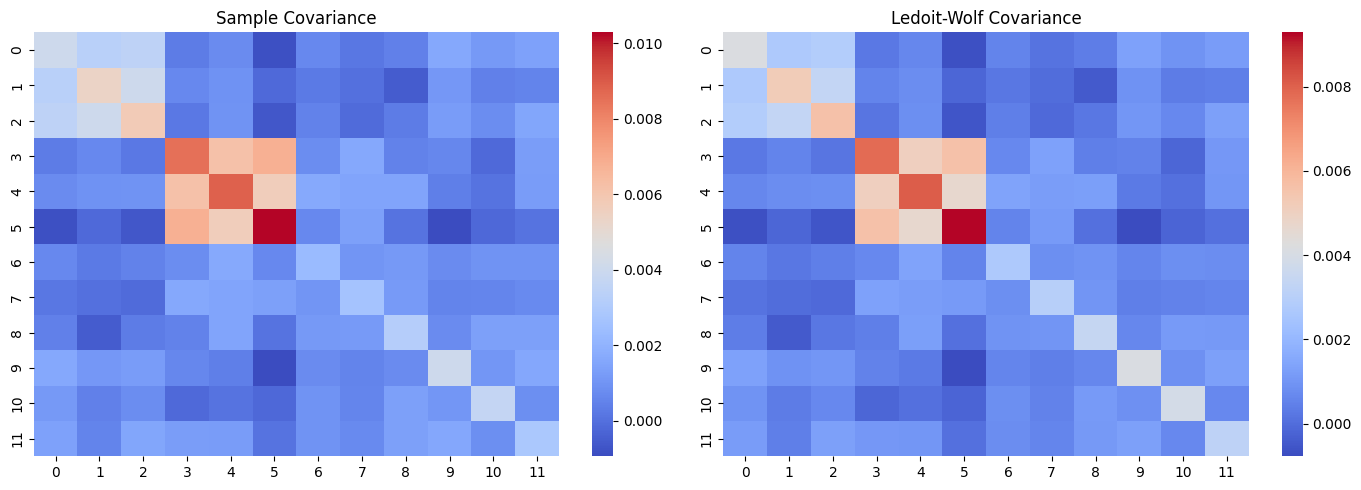

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(S, ax=axes[0], cmap="coolwarm")
axes[0].set_title("Sample Covariance")

sns.heatmap(S_lw, ax=axes[1], cmap="coolwarm")
axes[1].set_title("Ledoit-Wolf Covariance")

plt.tight_layout()
plt.show()

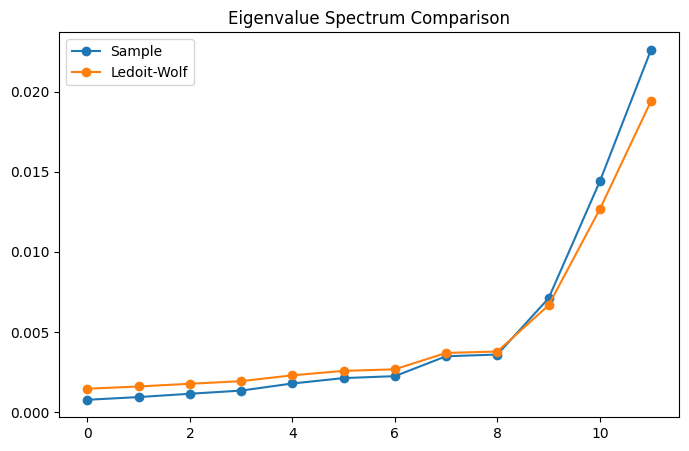

In [63]:
eig_sample = np.linalg.eigvalsh(S)
eig_lw = np.linalg.eigvalsh(S_lw)

plt.figure(figsize=(8,5))
plt.plot(sorted(eig_sample), marker='o', label="Sample")
plt.plot(sorted(eig_lw), marker='o', label="Ledoit-Wolf")
plt.title("Eigenvalue Spectrum Comparison")
plt.legend()
plt.show()

In [64]:
rf_annual = 0.067
rf = rf_annual/12

In [65]:
mu = monthly_log_returns.mean().values
ones = np.ones(len(mu))
excess_mu = mu - rf

numerator_sample = np.linalg.solve(S, excess_mu)
denominator_sample = ones @ numerator_sample

w_sample = numerator_sample / denominator_sample

numerator_lw = np.linalg.solve(S_lw, excess_mu)
denominator_lw = ones @ numerator_lw

w_lw = numerator_lw / denominator_lw

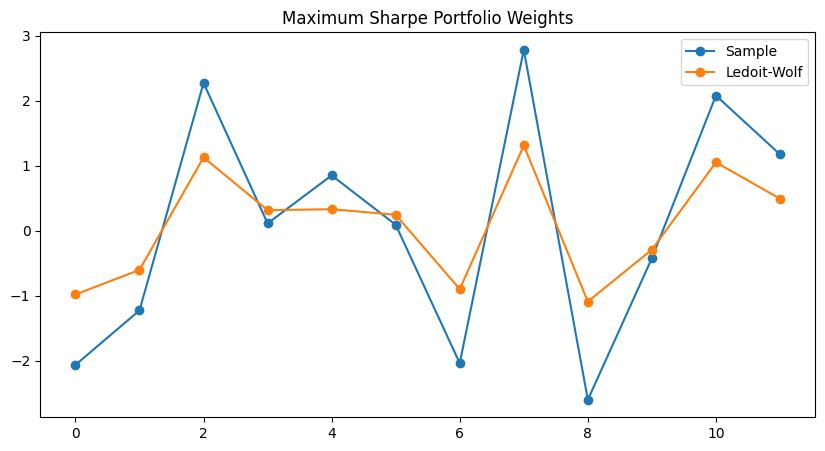

In [66]:
plt.figure(figsize=(10,5))
plt.plot(w_sample, marker='o', label="Sample")
plt.plot(w_lw, marker='o', label="Ledoit-Wolf")
plt.title("Maximum Sharpe Portfolio Weights")
plt.legend()
plt.show()